In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os

In [2]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

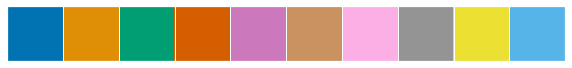

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [4]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [5]:
import warnings
warnings.simplefilter('ignore')

In [6]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (5692, 13)


In [7]:
import holoviews as hv
hv.notebook_extension()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [102]:
# %%time
# BES_data_folder = "../BES_analysis_data/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")

In [ ]:
# worth keeping up an eye on variable GeneralElectionVote intention variables
# and winConstituency

In [104]:
## Relevant BES variables for 2015 Campaign

# CampaignDayW5
# wt_daily_W5
# enddateW5 (formatted)

In [7]:
# underlying total distribution of Most Important Issue responses
BES_Panel["small_mii_catW5"].value_counts()

Economy               8794
Immigration           6274
Health                3752
Inequality            2812
Austerity/spending    1764
Negativity             986
Other                  979
Other lib-auth         650
Europe                 582
Terrorism              554
Environment            523
Other Left-right        79
Name: small_mii_catW5, dtype: int64

In [106]:
#
# sample size on each day (mean ~810)
BES_Panel["CampaignDayW5"].value_counts().sort_index()

1.0      796
2.0      974
3.0      987
4.0      910
5.0      885
6.0      762
7.0      777
8.0      792
9.0      890
10.0     667
11.0     745
12.0     672
13.0     638
14.0     760
15.0     830
16.0     785
17.0     717
18.0     771
19.0     635
20.0     634
21.0     805
22.0     827
23.0     787
24.0     440
25.0    1004
26.0     709
27.0     742
28.0     725
29.0     844
30.0     934
31.0     887
32.0     927
33.0     805
34.0     930
35.0     892
36.0    1016
37.0    1049
38.0     882
Name: CampaignDayW5, dtype: int64

In [228]:
# # actual crosstabs of campaign day vs MII
# crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
#                        columns = BES_Panel[ "small_mii_catW5" ],
#                        values  = BES_Panel[ "wt_daily_W5" ],
#                        aggfunc = sum,
#                        normalize='index')

# crosstab.index = crosstab.index.astype('int')
# crosstab.index.name = "Campaign Day"
# crosstab.columns.name = "Most Important Issue"

# # crosstab

In [242]:
search(BES_Panel,"mii.*W8")

miiW8              33502
bestOnMIIW8        30430
miieuW8            33502
EUMIICategoryW8    16181
euMIISmallW8       16181
mii_catW8          30405
LRAL_mii_catW8     30271
small_mii_catW8    29280
dtype: int64

In [20]:
def get_campaign_curve(index_var,column_var,wt_var,x_axis,y_axis,dimension_name,title):

    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')


    crosstab.index = crosstab.index.astype('int')
    crosstab.index.name = x_axis
    crosstab.columns.name = y_axis


    x_dim = hv.Dimension(x_axis, values = crosstab.index)
    y_dim = hv.Dimension(y_axis, unit = '%')

    curves = hv.HoloMap(kdims=[dimension_name])
    bars   = hv.HoloMap(kdims=[dimension_name])
    tables = hv.HoloMap(kdims=[dimension_name])

    ordered_columns = crosstab.sum().sort_values(ascending=False).index

    for mii in range(0 , len( crosstab.columns) ):

        df = crosstab[ ordered_columns[mii] ] * 100
        df.name = y_axis
        curves[mii] = hv.Curve(df ,
                               kdims = [x_dim] ,
                               vdims = [y_dim], group=ordered_columns[mii], label= title)

    #     tables[mii] = hv.Table( df, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )
    #     bars[mii]   = hv.Bars( df , kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )     

    return curves

In [21]:
def get_campaign_curve_unweighted_vars(index_var,column_vars,wt_var,x_axis,y_axis,dimension_name,title):

#     crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
#                            columns = BES_Panel[ column_var ],
#                            values  = BES_Panel[ wt_var ],
#                            aggfunc = sum,
#                            normalize='index')

    crosstab = BES_reduced_with_na[column_vars].groupby(BES_Panel[index_var ]).mean()/BES_reduced_with_na[column_vars].groupby(BES_Panel[ index_var ]).max()


    crosstab.index = crosstab.index.astype('int')
    crosstab.index.name = x_axis
    crosstab.columns.name = y_axis




    x_dim = hv.Dimension(x_axis, values = BES_Panel[ index_var ].astype('category').cat.categories)
    y_dim = hv.Dimension(y_axis, unit = '%')

    curves = hv.HoloMap(kdims=[dimension_name])
    bars   = hv.HoloMap(kdims=[dimension_name])
    tables = hv.HoloMap(kdims=[dimension_name])

#     ordered_columns = crosstab.sum().sort_values(ascending=False).index
    ordered_columns = crosstab.columns
    for mii in range(0 , len( crosstab.columns) ):

        df = crosstab[ ordered_columns[mii] ] * 100
        df.name = y_axis
        curves[mii] = hv.Curve(df ,
                               kdims = [x_dim] ,
                               vdims = [y_dim], group=ordered_columns[mii], label= title)

    #     tables[mii] = hv.Table( df, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )
    #     bars[mii]   = hv.Bars( df , kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )     

    return curves

In [25]:
def get_campaign_curve_dk_vars(index_var,column_var,wt_var,x_axis,y_axis,dimension_name,title,dk_value):

    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')

#     crosstab = BES_reduced_with_na.isnull()[column_vars].groupby(BES_Panel[index_var ]).mean()


    crosstab.index = crosstab.index.astype('int')
    crosstab.index.name = x_axis
    crosstab.columns.name = y_axis




    x_dim = hv.Dimension(x_axis, values = BES_Panel[ index_var ].astype('category').cat.categories)
    y_dim = hv.Dimension(y_axis, unit = '%')

    curves = hv.HoloMap(kdims=[dimension_name])
    bars   = hv.HoloMap(kdims=[dimension_name])
    tables = hv.HoloMap(kdims=[dimension_name])

#     ordered_columns = crosstab.sum().sort_values(ascending=False).index
    ordered_columns = crosstab.columns
    for mii in range(0 , len( crosstab.columns) ):

        df = crosstab[ ordered_columns[mii] ] * 100
        df.name = y_axis
        curves[mii] = hv.Curve(df.reset_index() ,
                               kdims = [x_dim] ,
                               vdims = [y_dim], group=ordered_columns[mii], label= title)

    #     tables[mii] = hv.Table( df, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )
    #     bars[mii]   = hv.Bars( df , kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )     

    return curves

In [26]:
%%output size = 180
get_campaign_curve_dk_vars(index_var = 'CampaignDayW12',
    column_var = "decidedVoteW12",
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE MII TYPE:",
    dk_value = "Don't know"           )    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [240]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW5',
    column_var = "small_mii_catW5",
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [241]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW5',
    column_var = "LRAL_mii_catW5",
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [244]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW8',
    column_var = "small_mii_catW8",
    wt_var = "wt_daily_W8",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2016EUREF MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [245]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW8',
    column_var = "LRAL_mii_catW8",
    wt_var = "wt_daily_W8",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2016EUREF MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [246]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW12',
    column_var = "small_mii_catW12",
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE MII CATEGORY:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [247]:
%%output size = 180
get_campaign_curve(index_var = 'CampaignDayW12',
    column_var = "LRAL_mii_catW12",
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE MII TYPE:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [417]:
%%output size = 180

campaign = "CampaignDayW5"
BES_reduced_with_na[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "pearson"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)

get_campaign_curve_unweighted_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE CORR VARS:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [419]:
len([x for x in df[df["abs_r"]>.05].index if "W5" in x])

18

In [420]:
%%output size = 180

campaign = "CampaignDayW5"
BES_reduced_with_na[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)

get_campaign_curve_unweighted_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE CORR VARS:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [415]:
[x for x in df[df["abs_r"]>.05].index if "UKIP" in x]

['labPartnerUKIPW5_Would join Labour',
 'conPartnerUKIPW5_Would join Conservatives']

In [421]:
len([x for x in df[df["abs_r"]>.05].index if "W5" in x])

18

In [109]:
search(BES_Panel,"discussant")

discussantsSameAddress_1W2         26958
discussantsSameAddress_2W2         20454
discussantsSameAddress_3W2         15450
discussantClassName1W2             24916
discussantClassName2W2             18224
discussantClassName3W2             13201
discussantEthnicity1W2             24916
discussantEthnicity2W2             18224
discussantEthnicity3W2             13201
discussantVoteName1W2              24916
discussantVoteName2W2              18224
discussantVoteName3W2              13202
discussantturnoutName1W2           24915
discussantturnoutName2W2           18223
discussantturnoutName3W2           13202
discussantsAccompaniedVote_1W2      5847
discussantsAccompaniedVote_2W2      4504
discussantsAccompaniedVote_3W2      3381
discussantsAccompaniedVote_4W2      2099
discussantsAccompaniedVote_5W2      6534
discussantsAccompaniedVote_6W2      6534
discussantsAccompaniedVote_noW2     6534
discussantApprovalVoteName1W2      24914
discussantApprovalVoteName2W2      18222
discussantApprov

In [416]:
df[df["abs_r"]>.05].index

Index(['postalTurnoutW5_Yes', 'discussPolDaysW5__7 days',
       'winConstituencySNPW5__100 - Very likely to win',
       'participation_5W5_Yes', 'majorityPartyLabW5__Very likely',
       'infoSourcePeopleW5__More than 2 hours',
       'fbInfo_1W5__Don't follow politics on facebook',
       'labPartnerSNPW5_Would join Labour',
       'fbInfo_3W5__Don't follow politics on facebook',
       'profile_newspaperW10_The Sun',
       'generalElectionVoteSqueezeW11_Conservative',
       'majorityPartyConW5__Very likely',
       'fbInfo_2W5__Don't follow politics on facebook',
       'discussantVoteName1W12_Labour', 'labPartnerUKIPW5_Would join Labour',
       'conPartnerUKIPW5_Would join Conservatives',
       'discussantVoteName1W12_Conservative', 'profile_socgradeW8__E',
       'newspaperW12_The Sun', 'refFairnessW2W3__Strongly agree',
       'profile_newspaperW11_The Guardian', 'resourceAccess3_5W7_Yes',
       'profile_work_responsibilityW14__Over 100',
       'scotElectionVoteListW8_Scot

In [287]:
%%output size = 180

campaign = "CampaignDayW8"
BES_reduced_with_na[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)

get_campaign_curve_unweighted_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W8",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2016EUREF CORR VARS:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [108]:
%%output size = 180

campaign = "CampaignDayW12"
BES_reduced_with_na[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)

get_campaign_curve_unweighted_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE CORR VARS:")    

:HoloMap   [MII]
   :Curve   [Campaign Day]   (Most Important Issue)

In [ ]:
# partyContact

In [32]:
# [x for x in df.index if "decidedVote" in x]
df.loc['decidedVoteW12_No, not decided yet']

r           -0.04
p            0.00
N        27896.00
abs_r        0.04
Name: decidedVoteW12_No, not decided yet, dtype: float64

In [40]:
pd.get_dummies(BES_Panel["decidedVoteW12"]).corrwith(BES_Panel["CampaignDayW12"])

decidedVoteW12
Yes, decided          -0.089357
No, not decided yet   -0.075553
Will not vote         -0.004278
Don't know            -0.029508
dtype: float64

In [97]:
campaign = "CampaignDayW12"
# BES_reduced_with_na[campaign] = BES_Panel[campaign]

cols = BES_Panel[[x for x in BES_Panel.columns if ("W12" in x) and
                  (BES_Panel[x].dtypes.name=="category") and
                  (len(BES_Panel[x].cat.categories)<=12)]].columns

df = pd.get_dummies( BES_Panel[cols] )
df[campaign] = BES_Panel[campaign]

pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary( df, name, corr_type, pattern=pattern)





In [98]:
df

r     p      N  abs_r
debateThreeWatchW12_No                     0.61  0.00  34394   0.61
debateOneWatchW12_No                       0.61  0.00  34394   0.61
debateTwoWatchW12_No                       0.57  0.00  34394   0.57
debateTwoWatchW12_Yes                      0.35  0.00  34394   0.35
debateThreeWatchW12_Yes                    0.34  0.00  34394   0.34
...                                         ...   ...    ...    ...
ptvLabW12_Very unlikely                   -0.01  0.01  34394   0.01
cutsTooFarNationalW12_Not gone far enough -0.01  0.01  34394   0.01
discussantVoteName2W12_Labour              0.01  0.01  34394   0.01
achieveReduceImmigNoneW12_Yes             -0.01  0.01  34394   0.01
handleMIILabW12_2.0                       -0.01  0.01  34394   0.01

[554 rows x 4 columns]

In [107]:
df.loc[[x for x in df[df["abs_r"]>.05].index if "partyContact" not in x]]

r    p      N  abs_r
debateThreeWatchW12_No                              0.61  0.0  34394   0.61
debateOneWatchW12_No                                0.61  0.0  34394   0.61
debateTwoWatchW12_No                                0.57  0.0  34394   0.57
debateTwoWatchW12_Yes                               0.35  0.0  34394   0.35
debateThreeWatchW12_Yes                             0.34  0.0  34394   0.34
debateOneWatchW12_Yes                               0.32  0.0  34394   0.32
small_mii_catW12_Terrorism                          0.27  0.0  34394   0.27
postalTurnoutW12_Yes                                0.24  0.0  34394   0.24
noChanceCoalitionLabW12_Yes                        -0.23  0.0  34394   0.23
noChanceCoalitionLabW12_No                          0.22  0.0  34394   0.22
postalTurnoutW12_No                                -0.19  0.0  34394   0.19
majorityPartyLabW12_Very unlikely                  -0.17  0.0  34394   0.17
majorityPartyConW12_Very likely                    -0.16  0.0  34394   0.16
labUnitedW12_Very divided                          -0.15  0.0  34394   0.15
generalElectionVotePostW12_Conservative             0.15  0.0  34394   0.15
turnoutUKGeneralW12_Very likely that I would vote  -0.14  0.0  34394   0.14
small_mii_catW12_Europe                            -0.14  0.0  34394   0.14
generalElectionVotePostW12_Labour                   0.14  0.0  34394   0.14
labCandCorbyniteW12_Yes                             0.11  0.0  34394   0.11
labUnitedW12_Fairly united                          0.10  0.0  34394   0.10
debateThreeWatchW12_Don't know                      0.10  0.0  34394   0.10
debateTwoWatchW12_Don't know                        0.10  0.0  34394   0.10
bestPMW12_Jeremy Corbyn                             0.10  0.0  34394   0.10
participation_5W12_Yes                              0.10  0.0  34394   0.10
changeViewW12_Yes                                   0.09  0.0  34394   0.09
generalElectionVoteUnsqueezeW12_Conservative       -0.09  0.0  34394   0.09
majorityPartyConW12_6.0                             0.09  0.0  34394   0.09
debateOneWatchW12_Don't know                        0.09  0.0  34394   0.09
decidedVoteW12_Yes, decided                        -0.09  0.0  34394   0.09
participation_5W12_No                              -0.09  0.0  34394   0.09
changeViewW12_No                                   -0.09  0.0  34394   0.09
noChanceCoalitionSNPW12_No                          0.09  0.0  34394   0.09
majorityPartyLabW12_5.0                             0.09  0.0  34394   0.09
decidedVoteW12_No, not decided yet                 -0.08  0.0  34394   0.08
labUnitedW12_Neither united nor divided             0.08  0.0  34394   0.08
majorityPartyConW12_5.0                             0.08  0.0  34394   0.08
labCandCorbyniteW12_Don't know                     -0.08  0.0  34394   0.08
noChanceCoalitionSNPW12_Yes                        -0.08  0.0  34394   0.08
generalElectionVoteW12_Labour                       0.07  0.0  34394   0.07
generalElectionCertaintyW12_Completely certain     -0.07  0.0  34394   0.07
fbInfo_2W12_Yes                                     0.07  0.0  34394   0.07
generalElectionVotePostW12_Liberal Democrat         0.07  0.0  34394   0.07
majorityPartyLabW12_6.0                             0.07  0.0  34394   0.07
generalElectionCertaintyUnsqW12_Completely certain -0.07  0.0  34394   0.07
majorityPartyConW12_7.0                             0.06  0.0  34394   0.06
discussPolDaysW12_7 days                            0.06  0.0  34394   0.06
majorityPartyLabW12_7.0                             0.06  0.0  34394   0.06
bestPMW12_Theresa May                              -0.06  0.0  34394   0.06
participation_6W12_Yes                              0.06  0.0  34394   0.06
fbInfo_3W12_Don't follow politics on facebook      -0.06  0.0  34394   0.06
fbInfo_1W12_Don't follow politics on facebook      -0.06  0.0  34394   0.06
fbInfo_2W12_Don't follow politics on facebook      -0.06  0.0  34394   0.06

In [93]:
pd.get_dummies( BES_Panel.loc[0:2,cols] ).shape

(3, 2165)

In [100]:
# BES_Panel.loc[0:10,cols[0:2]].apply(lambda x: pd.get_dummies(x))

In [99]:
# BES_Panel[cols[0:2]].apply(lambda x: pd.get_dummies(x),axis=1)

In [67]:
# search(BES_reduced_with_na,'winConstituencyLabW12')

winConstituencyLabW12__100 - Very likely to win    32049
dtype: int64

In [28]:
%%output size = 180

campaign = "CampaignDayW12"
df = BES_reduced_with_na.isnull()
df[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(df, name, corr_type, pattern=pattern)

# get_campaign_curve_dk_vars(index_var = campaign,
#     column_vars = df[df["abs_r"]>.05].index,
#     wt_var = "wt_daily_W12",
#     x_axis = "Campaign Day",
#     y_axis = "Most Important Issue",
#     dimension_name = "MII",
#     title = "2017GE CORR VARS:")    

KeyboardInterrupt: 

In [19]:
set( [new_old_col_names[x] for x in df[df["abs_r"]>.05].index if "partyContact" not in x] )

{'debateOneWatchW12',
 'debateThreeWatchW12',
 'debateTwoWatchW12',
 'decidedVoteW12',
 'generalElectionCertaintySqW12',
 'generalElectionCertaintyUnsqW12',
 'generalElectionCertaintyW12',
 'generalElectionVotePostW12',
 'generalElectionVoteSqueezeW12',
 'generalElectionVoteUnsqueezeW12',
 'labCandCorbyniteW12',
 'turnoutUKGeneralW12'}

In [ ]:
%%output size = 180

campaign = "CampaignDayW12"
BES_reduced_with_na[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)

get_campaign_curve_unweighted_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE CORR VARS:")    

In [14]:
set(["".join( x.split("_")[:-1]) for x in df[df["abs_r"]>.05].index])

{'debateOneWatchW12',
 'debateThreeWatchW12',
 'debateTwoWatchW12',
 'decidedVoteW12',
 'generalElectionCertaintySqW12',
 'generalElectionCertaintyUnsqW12',
 'generalElectionCertaintyW12',
 'generalElectionVotePostW12',
 'generalElectionVoteSqueezeW12',
 'generalElectionVoteUnsqueezeW12',
 'labCandCorbyniteW12',
 'partyContactCon1W12',
 'partyContactCon2W12',
 'partyContactCon3W12',
 'partyContactCon4W12',
 'partyContactCon5W12',
 'partyContactCon6W12',
 'partyContactCon7W12',
 'partyContactConW12',
 'partyContactLD1W12',
 'partyContactLD2W12',
 'partyContactLD3W12',
 'partyContactLD4W12',
 'partyContactLD5W12',
 'partyContactLD6W12',
 'partyContactLD7W12',
 'partyContactLDW12',
 'partyContactLab1W12',
 'partyContactLab2W12',
 'partyContactLab3W12',
 'partyContactLab4W12',
 'partyContactLab5W12',
 'partyContactLab6W12',
 'partyContactLab7W12',
 'partyContactLabW12',
 'partyContactNoneW12',
 'partyContactOtherPartyW12',
 'partyContactUKIPW12',
 'turnoutUKGeneralW12'}

In [ ]:
get_campaign_curve_dk_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W12",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2017GE CORR VARS:")    

In [ ]:
df[df["abs_r"]>.05]

In [ ]:
%%output size = 180

campaign = "CampaignDayW5"
df = BES_reduced_with_na.isnull()
df[campaign] = BES_Panel[campaign]


pattern = campaign
name = campaign
corr_type = "spearman"
df,corr_type = make_corr_summary(df, name, corr_type, pattern=pattern)

get_campaign_curve_dk_vars(index_var = campaign,
    column_vars = df[df["abs_r"]>.05].index,
    wt_var = "wt_daily_W5",
    x_axis = "Campaign Day",
    y_axis = "Most Important Issue",
    dimension_name = "MII",
    title = "2015GE CORR VARS:")    

In [ ]:
df[df["abs_r"]>.05]

In [ ]:
###############################################################################################################
### BEYOND HERE BE UGLINESS ###################################################################################
###############################################################################################################

In [ ]:
# So, peering through your data - would be great to get contact rates by the main parties in 2017 as a single simple graph



In [371]:
search(BES_Panel,"partyContact.*W12", mask = BES_Panel[ index_var ].notnull()).sort_values()

partyContactPC_1W12            424
partyContactPC_2W12            424
partyContactPC_3W12            424
partyContactPC_4W12            424
partyContactPC_5W12            424
partyContactPC_6W12            424
partyContactPC_7W12            424
partyContactOther_7W12         802
partyContactOther_6W12         802
partyContactOther_3W12         802
partyContactOther_5W12         802
partyContactOther_4W12         802
partyContactOther_2W12         802
partyContactOther_1W12         802
partyContactUKIP_7W12          999
partyContactUKIP_6W12          999
partyContactUKIP_2W12          999
partyContactUKIP_3W12          999
partyContactUKIP_4W12          999
partyContactUKIP_5W12          999
partyContactUKIP_1W12          999
partyContactPCW12             1122
partyContactSNP_7W12          1237
partyContactSNP_6W12          1237
partyContactSNP_5W12          1237
partyContactSNP_4W12          1237
partyContactSNP_3W12          1237
partyContactSNP_2W12          1237
partyContactSNP_1W12

In [428]:
search(BES_Panel,"partyContact.*W5")

partyContact1W5             11241
partyContactConW5            5457
partyContactLabW5            5457
partyContactLDW5             5457
partyContactSNPW5            1212
partyContactPCW5              586
partyContactUKIPW5           5457
partyContactGrnW5            5457
partyContactOtherPartyW5     5457
partyContactNoneW5           5457
partyContactDKW5             5457
partyContactCon_1W5          3237
partyContactCon_2W5          3237
partyContactCon_3W5          3237
partyContactCon_4W5          3237
partyContactCon_5W5          3237
partyContactCon_6W5          3237
partyContactCon_7W5          3237
partyContactLab_1W5          3756
partyContactLab_2W5          3756
partyContactLab_3W5          3756
partyContactLab_4W5          3756
partyContactLab_5W5          3756
partyContactLab_6W5          3756
partyContactLab_7W5          3756
partyContactLD_1W5           2156
partyContactLD_2W5           2156
partyContactLD_3W5           2156
partyContactLD_4W5           2156
partyContactLD

In [429]:
search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|PC|SNP|None|OtherParty)W5").index

Index(['partyContactConW5', 'partyContactLabW5', 'partyContactLDW5',
       'partyContactSNPW5', 'partyContactPCW5', 'partyContactUKIPW5',
       'partyContactGrnW5', 'partyContactOtherPartyW5', 'partyContactNoneW5'],
      dtype='object')

In [424]:
search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|None|DK|OtherParty|StrongerIn|VoteLeave|OthLeave|OthRemain)W8").index

Index(['partyContactConW8', 'partyContactLabW8', 'partyContactLDW8',
       'partyContactUKIPW8', 'partyContactGrnW8', 'partyContactOtherPartyW8',
       'partyContactStrongerInW8', 'partyContactVoteLeaveW8',
       'partyContactOthLeaveW8', 'partyContactOthRemainW8',
       'partyContactNoneW8', 'partyContactDKW8'],
      dtype='object')

In [427]:
search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|PC|SNP|None|OtherParty)W12").index

Index(['partyContactConW12', 'partyContactLabW12', 'partyContactLDW12',
       'partyContactSNPW12', 'partyContactPCW12', 'partyContactUKIPW12',
       'partyContactOtherPartyW12', 'partyContactNoneW12',
       'partyContactGrnW12'],
      dtype='object')

In [ ]:
search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|None|OtherParty|1)W"+str(wave)).index

In [9]:
wave = 12

index_var = 'CampaignDayW'+str(wave)
column_vars = search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|None|OtherParty|1)W"+str(wave)).index
wt_var = "wt_daily_W"+str(wave)
# x_axis = "Campaign Day",
# y_axis = "Most Important Issue",
# dimension_name = "MII",
# title = "2015GE MII CATEGORY:")  

df_list = []
for column_var in column_vars:
    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')

    crosstab.columns = [crosstab.columns.name + x for x in crosstab.columns]
    df_list.append(crosstab)
    
df = pd.concat(df_list,axis=1)
df.index = df.index.astype('int')

df.to_msgpack("BES_GE2017_PartyContactRates_by_campaign_day.msgpack")
df.to_csv("BES_GE2017_PartyContactRates_by_campaign_day.csv")

In [10]:
wave = 8

index_var = 'CampaignDayW'+str(wave)
column_vars = search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|None|DK|OtherParty|StrongerIn|VoteLeave|OthLeave|OthRemain)W"+str(wave)).index
wt_var = "wt_daily_W"+str(wave)
# x_axis = "Campaign Day",
# y_axis = "Most Important Issue",
# dimension_name = "MII",
# title = "2015GE MII CATEGORY:")  

df_list = []
for column_var in column_vars:
    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')

    crosstab.columns = [crosstab.columns.name + x for x in crosstab.columns]
    df_list.append(crosstab)
    
df = pd.concat(df_list,axis=1)
df.index = df.index.astype('int')

df.to_msgpack("BES_EUREF2016_PartyContactRates_by_campaign_day.msgpack")
df.to_csv(    "BES_EUREF2016_PartyContactRates_by_campaign_day.csv")

In [12]:
wave = 5

index_var = 'CampaignDayW'+str(wave)
column_vars = search(BES_Panel,"partyContact(Con|Lab|LD|Grn|UKIP|None|OtherParty|1)W"+str(wave)).index
wt_var = "wt_daily_W"+str(wave)
# x_axis = "Campaign Day",
# y_axis = "Most Important Issue",
# dimension_name = "MII",
# title = "2015GE MII CATEGORY:")  

df_list = []
for column_var in column_vars:
    crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
                           columns = BES_Panel[ column_var ],
                           values  = BES_Panel[ wt_var ],
                           aggfunc = sum,
                           normalize='index')

    crosstab.columns = [crosstab.columns.name + x for x in crosstab.columns]
    df_list.append(crosstab)
    
df = pd.concat(df_list,axis=1)
df.index = df.index.astype('int')

df.to_msgpack("BES_GE2015_PartyContactRates_by_campaign_day.msgpack")
df.to_csv(    "BES_GE2015_PartyContactRates_by_campaign_day.csv")

In [19]:
# crosstab = pd.crosstab(index   = BES_Panel[ index_var ],
#                        columns = BES_Panel[ column_var ],
#                        values  = BES_Panel[ wt_var ],
#                        aggfunc = sum,
#                        normalize='index')
crosstab
# BES_Panel[ index_var ]

partyContactNoneW5        No       Yes  Don't know
CampaignDayW5                                     
1.0                 1.000000  0.000000    0.000000
26.0                0.982974  0.000000    0.017026
27.0                0.982120  0.008076    0.009805
28.0                0.988257  0.002454    0.009288
29.0                0.952177  0.025901    0.021922
30.0                0.993452  0.000000    0.006548
31.0                0.983158  0.004563    0.012280
32.0                0.990640  0.006605    0.002755
33.0                0.989859  0.001016    0.009125
34.0                0.984839  0.009327    0.005834
35.0                0.979190  0.004239    0.016572
36.0                0.997587  0.000000    0.002413
37.0                0.979826  0.005327    0.014846
38.0                0.981630  0.001786    0.016585

In [28]:
(BES_Panel["partyContactConW5"]=="Yes").groupby(BES_Panel["CampaignDayW5"]).mean()

CampaignDayW5
1.0     0.001256
2.0     0.000000
3.0     0.000000
4.0     0.000000
5.0     0.000000
6.0     0.000000
7.0     0.000000
8.0     0.000000
9.0     0.000000
10.0    0.000000
11.0    0.000000
12.0    0.000000
13.0    0.000000
14.0    0.000000
15.0    0.000000
16.0    0.000000
17.0    0.000000
18.0    0.000000
19.0    0.000000
20.0    0.000000
21.0    0.000000
22.0    0.000000
23.0    0.000000
24.0    0.000000
25.0    0.000000
26.0    0.251058
27.0    0.245283
28.0    0.273103
29.0    0.280806
30.0    0.253747
31.0    0.290868
32.0    0.291262
33.0    0.293168
34.0    0.307527
35.0    0.292601
36.0    0.295276
37.0    0.313632
38.0    0.299320
Name: partyContactConW5, dtype: float64

In [411]:
BES_Panel["partyContactUKIPW12"].value_counts(dropna=False)

NaN           61248
No            11345
Yes             999
Don't know      111
Name: partyContactUKIPW12, dtype: int64

In [410]:
# 
BES_Panel["partyContactGrnW12"].value_counts(dropna=False)

NaN           61248
No            12344
Don't know      111
Name: partyContactGrnW12, dtype: int64

In [408]:
df.to_msgpack("BES_GE2017_PartyContactRates_by_campaign_day.msgpack")

partyContact1W12No  partyContact1W12Yes  \
CampaignDayW12                                            
1                         0.685544             0.245616   
2                         0.732661             0.225163   
3                         0.728309             0.227351   
4                         0.741246             0.215584   
5                         0.752052             0.201530   
6                         0.726432             0.207772   
7                         0.728936             0.217046   
8                         0.749644             0.202813   
9                         0.743192             0.191511   
10                        0.741820             0.194238   
11                        0.735088             0.208600   
12                        0.735815             0.204100   
13                        0.727261             0.215774   
14                        0.678375             0.239575   
15                        0.651984             0.297857   
16                        0.634703             0.312056   
17                        0.594877             0.346698   
18                        0.604496             0.334114   
19                        0.624222             0.340988   
20                        0.607562             0.322767   
21                        0.597579             0.327361   
22                        0.574212             0.379282   
23                        0.571500             0.365522   
24                        0.573363             0.353455   
25                        0.592215             0.340741   
26                        0.602619             0.339329   
27                        0.565189             0.379123   
28                        0.546846             0.394016   
29                        0.539253             0.401954   
30                        0.538260             0.400098   
31                        0.542494             0.387070   
32                        0.551712             0.392935   
33                        0.560185             0.406936   
34                        0.538263             0.425826   

                partyContact1W12Don't know  partyContactConW12No  \
CampaignDayW12                                                     
1                                 0.068840              0.557814   
2                                 0.042177              0.548715   
3                                 0.044340              0.538470   
4                                 0.043170              0.556408   
5                                 0.046419              0.529345   
6                                 0.065796              0.549358   
7                                 0.054019              0.536289   
8                                 0.047543              0.578094   
9                                 0.065297              0.515499   
10                                0.063942              0.501162   
11                                0.056312              0.499584   
12                                0.060086              0.526342   
13                                0.056965              0.478852   
14                                0.082049              0.406744   
15                                0.050159              0.455799   
16                                0.053242              0.446482   
17                                0.058425              0.491060   
18                                0.061389              0.435311   
19                                0.034790              0.412996   
20                                0.069670              0.469740   
21                                0.075061              0.446539   
22                                0.046506              0.470084   
23                                0.062977              0.497985   
24                                0.073182              0.444881   
25                                0.067044              0.506301   
26                                0.058052             

In [ ]:
%%time
mean_daily_std = BES_reduced_with_na.groupby(BES_Panel[ 'CampaignDayW12' ]).std().mean()
whole_period_std = BES_reduced_with_na[BES_Panel[ 'CampaignDayW12' ].notnull()].std()
relative_stds = mean_daily_std/whole_period_std
display( relative_stds.dropna().sort_values() )

In [362]:
temp = BES_reduced_with_na[["postalTurnoutW12_Yes","handleMIILDW12__Very well"]].groupby(BES_Panel[ 'CampaignDayW12' ]).apply(lambda x: x.values)
[temp.values[:][ind] for ind in range(0,len(temp.values[0][0]))]
                                                                                                                       #[x.values[:,ind] for ind in range(0,x.shape[1])])
                                                                                                                       
#                                                                                                                        x.values[:,1])


[array([[nan, nan],
        [nan, nan],
        [ 0., nan],
        ...,
        [ 0., nan],
        [nan, nan],
        [ 0., nan]], dtype=float32), array([[nan,  0.],
        [nan,  0.],
        [nan, nan],
        ...,
        [nan, nan],
        [ 0., nan],
        [nan, nan]], dtype=float32)]

In [363]:
temp

CampaignDayW12
1.0     [[nan, nan], [nan, nan], [0.0, nan], [nan, nan...
2.0     [[nan, 0.0], [nan, 0.0], [nan, nan], [0.0, nan...
3.0     [[0.0, nan], [nan, 5.0], [nan, nan], [nan, 2.0...
4.0     [[nan, nan], [nan, 5.0], [0.0, nan], [nan, nan...
5.0     [[nan, nan], [0.0, nan], [nan, nan], [nan, 6.0...
6.0     [[nan, nan], [0.0, nan], [nan, 0.0], [0.0, nan...
7.0     [[0.0, nan], [nan, 6.0], [nan, 7.0], [0.0, 3.0...
8.0     [[nan, nan], [nan, nan], [nan, nan], [nan, nan...
9.0     [[nan, nan], [nan, nan], [0.0, nan], [nan, 4.0...
10.0    [[nan, nan], [nan, nan], [1.0, 2.0], [1.0, nan...
11.0    [[0.0, nan], [nan, nan], [nan, nan], [0.0, nan...
12.0    [[0.0, nan], [nan, nan], [nan, nan], [0.0, nan...
13.0    [[nan, 0.0], [0.0, nan], [nan, 7.0], [nan, nan...
14.0    [[nan, nan], [nan, nan], [nan, 3.0], [1.0, nan...
15.0    [[nan, nan], [nan, nan], [nan, 7.0], [0.0, nan...
16.0    [[nan, nan], [nan, nan], [0.0, nan], [nan, 4.0...
17.0    [[nan, nan], [nan, nan], [nan, nan], [nan, 0.0...

In [338]:
var1 = "postalTurnoutW12_Yes"
var1 = "handleMIILDW12__Very well"
# var1 = "newspaperW12_The Times"
x = BES_reduced_with_na[var1].groupby(BES_Panel[ 'CampaignDayW12' ]).apply(lambda x: x.values)
x.values

array([array([nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,  0., nan,  0.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,
       nan, nan, nan, nan, nan, nan, nan, nan, 10., nan, nan, nan,  1.,
        0., nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan,
       nan,  7., nan, nan, nan,  0., nan, nan, nan, nan,  4., nan, nan,
        1., nan, nan, nan, nan, nan, nan, nan,  3., nan,  2., nan,  8.,
        0., nan,  0.,  0.,  4.,  2., nan, nan, nan, nan, nan, nan,  5.,
       nan, nan, nan, nan, nan, nan,  2.,  3., nan,  0., nan,  4.,  2.,
        6., nan,  3., nan, nan, nan, nan, nan,  4., nan, nan, nan,  1.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  3.,
       nan,  9., nan,  3.,  4., nan,  4., nan, nan, nan, nan, nan, nan,
        0., nan,  5., nan, nan, nan, nan,  3., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  7., nan, nan, nan, nan, nan,
        0., nan, nan, nan,  4.,  0., nan, nan, nan, nan, 

In [339]:
from scipy import stats
np.random.seed(314159)
stats.anderson_ksamp(x)

Anderson_ksampResult(statistic=159525.97250622284, critical_values=array([0.62916916, 1.31527699, 1.75205495, 2.14816674, 2.63116949]), significance_level=0.0)

In [335]:
from scipy import stats
np.random.seed(314159)
res = stats.anderson_ksamp(x)


In [337]:
res.statistic

2.460375589342766

In [303]:
from scipy.stats import friedmanchisquare

In [317]:
friedmanchisquare( *[y[0:min([len(y) for y in x])] for y in x] )

FriedmanchisquareResult(statistic=9200.309153420507, pvalue=0.0)

FriedmanchisquareResult(statistic=9200.309153420507, pvalue=0.0)

[array([nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,  0., nan,  0.,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,
        nan, nan, nan, nan, nan, nan, nan, nan, 10., nan, nan, nan,  1.,
         0., nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan,
        nan,  7., nan, nan, nan,  0., nan, nan, nan, nan,  4., nan, nan,
         1., nan, nan, nan, nan, nan, nan, nan,  3., nan,  2., nan,  8.,
         0., nan,  0.,  0.,  4.,  2., nan, nan, nan, nan, nan, nan,  5.,
        nan, nan, nan, nan, nan, nan,  2.,  3., nan,  0., nan,  4.,  2.,
         6., nan,  3., nan, nan, nan, nan, nan,  4., nan, nan, nan,  1.,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  3.,
        nan,  9., nan,  3.,  4., nan,  4., nan, nan, nan, nan, nan, nan,
         0., nan,  5., nan, nan, nan, nan,  3., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan,  7., nan, nan, nan, nan, nan,
         0., nan, nan, nan,  4.,  0., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  9., nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  0.,  7.,  2., nan, nan,  0.,  6., nan, nan, nan, nan,
        nan, nan, nan, nan, nan,  8., nan, nan,  0., nan, nan,  5., nan,
         3., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  2., nan, nan,
         0.,  3., nan, nan,  0., nan, nan, nan, nan, nan,  0., nan, nan,
        nan, nan,  0., nan, nan, nan, nan, nan, nan, nan,  5., nan,  3.,
        nan,  7., nan, nan, nan,  6., nan,  3.,  3., nan, nan,  0., nan,
        nan, nan,  3.,  3.,  8., nan, nan,  2., nan, nan, nan, nan,  2.,
        nan,  0.,  0.,  0., nan,  2., nan, nan, nan,  5.,  2., nan, nan,
        nan, nan, nan, nan, nan,  0., nan,  4., nan, nan, nan, nan,  4.,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  4.,
        nan, nan, nan, nan, nan, nan,  2., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan,  5., nan, nan, nan, nan, nan, nan, nan,
         0., nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,  6., nan,
        nan, nan,  0., nan, nan, nan,  5., nan, nan, nan, nan,  4., nan,
        nan, nan, nan, nan, nan,  0., nan,  5., nan, nan, nan,  3., nan,
        nan,  3., nan,  0., nan,  3.,  7., nan,  0., nan, nan, nan, nan,
        nan, nan, nan,  6., nan, nan, nan, nan,  0., nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan,  0.,  0.,  0., nan, nan,  1.,  0.,
        nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  2., nan, nan, nan, nan,  4., nan, nan, nan,
        nan, nan, nan,  6., nan, nan,  2., nan, nan,  2., nan,  0., nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  0., nan, nan, nan,  2., nan, nan, nan, nan, nan, nan,
        nan, nan, nan,  8., nan,  4., nan, nan, nan, nan, nan,  4., nan,
        nan,  6., nan, nan, nan, nan, nan, nan,  9.,  4., nan, nan, nan,
         0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan,  3., nan, nan,  3.,  3., nan,
         0.,  1., nan, nan,  0., nan,  7., nan,  2.,  0., nan, nan,  6.,
        nan,  4., nan,  4., nan, nan,  1., nan, nan, nan, nan, nan, nan,
         8., nan, nan, nan, nan,  3., nan, nan, nan, nan, nan,  3., nan,
        nan,  8., nan, nan, nan, nan,  0., nan, nan, nan, nan,  5., nan,
        nan, nan, nan, nan,  0., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  6., nan,  5., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  5., nan, nan, nan, nan, nan,  4., nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  7., nan,
         7., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  5.,  7., nan, nan, nan,  5., nan, nan, nan, nan,  6.,
        nan, nan, nan,  5., nan, nan, nan, nan, nan, nan, 

In [248]:
# %%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

# macro.to.bars(['Like Natalie Bennett', '2015GE Campaign Day'], 'Frequency', [])

In [ ]:
## try same thing on EU referendum campaign

## PROBLEM -> data doesn't exist in Wave 10 (because they had to rush it out? Maybe it's in wave9?)

## Nope - not out yet!

In [ ]:
# key_dimensions   = [('year', 'Year'), ('country', 'Country')]



In [124]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

corr_vars = corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

bars     = hv.HoloMap(kdims=['corr_vars'])
tables   = hv.HoloMap(kdims=['corr_vars'])

b = pd.DataFrame(columns = ["Variable","CampaignDayW5","frequency","corr_var"])

for corr_var_no in range(0,len(corr_vars)):
    corr_var = corr_vars[corr_var_no]

    # actual crosstabs of campaign day vs MII
    crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                           columns = BES_Panel[ corr_var ],
                           values  = BES_Panel[ "wt_daily_W5" ],
                           aggfunc = sum,
                           normalize='index')

    a = pd.DataFrame(crosstab.unstack()).reset_index()
    a.columns = [corr_var,"CampaignDayW5","frequency"]
#     a["corr_var"] = corr_var
    
#     b=b.append(a, ignore_index = True)

    key_dimensions   = [('CampaignDayW5', '2015GE Campaign Day'), (corr_var, corr_var)]
    value_dimensions = [('frequency', 'Frequency')]
    tables[corr_var_no] = hv.Table(a, kdims=key_dimensions, vdims=value_dimensions)
#     bars[corr_var_no]   = tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])
    bars[corr_var_no]   = tables[corr_var_no].to.bars(['CampaignDayW5', '2015GE Campaign Day'], 'Frequency', [], label=corr_var)
    print(corr_var)
                         
bars

postalTurnoutW5
discussPolDaysW5
winConstituencySNPW5
participation_5W5
likeBennettW5
infoSourcePeopleW5
fbInfo_1W5
majorityPartyLabW5
labPartnerSNPW5
fbInfo_3W5
lrgreensW5
fbInfo_2W5
partyContactConW5
lrPCW5
lrSNPW5
majorityPartyConW5
conPartnerSNPW5
noChanceCoalitionSNPW5
noChanceCoalitionLDW5
conToneW5
labPartnerUKIPW5


:HoloMap   [corr_vars]
   :Bars   [CampaignDayW5,CampaignDayW5]   (frequency)

In [250]:
# hv.Table(a, kdims=key_dimensions, vdims=value_dimensions)

In [251]:
# a

In [252]:
# tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])


In [253]:
# tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])

In [254]:
# tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])

In [255]:
# %%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))
# bars[20]

:Layout
   .Overlay.I  :Overlay
      .Area.I   :Area   [x]   (value)
      .Area.II  :Area   [x]   (value)
      .Area.III :Area   [x]   (value)
      .Area.IV  :Area   [x]   (value)
      .Area.V   :Area   [x]   (value)
   .Overlay.II :Overlay
      .Area.I   :Area   [x]   (value,Baseline)
      .Area.II  :Area   [x]   (value,Baseline)
      .Area.III :Area   [x]   (value,Baseline)
      .Area.IV  :Area   [x]   (value,Baseline)
      .Area.V   :Area   [x]   (value,Baseline)
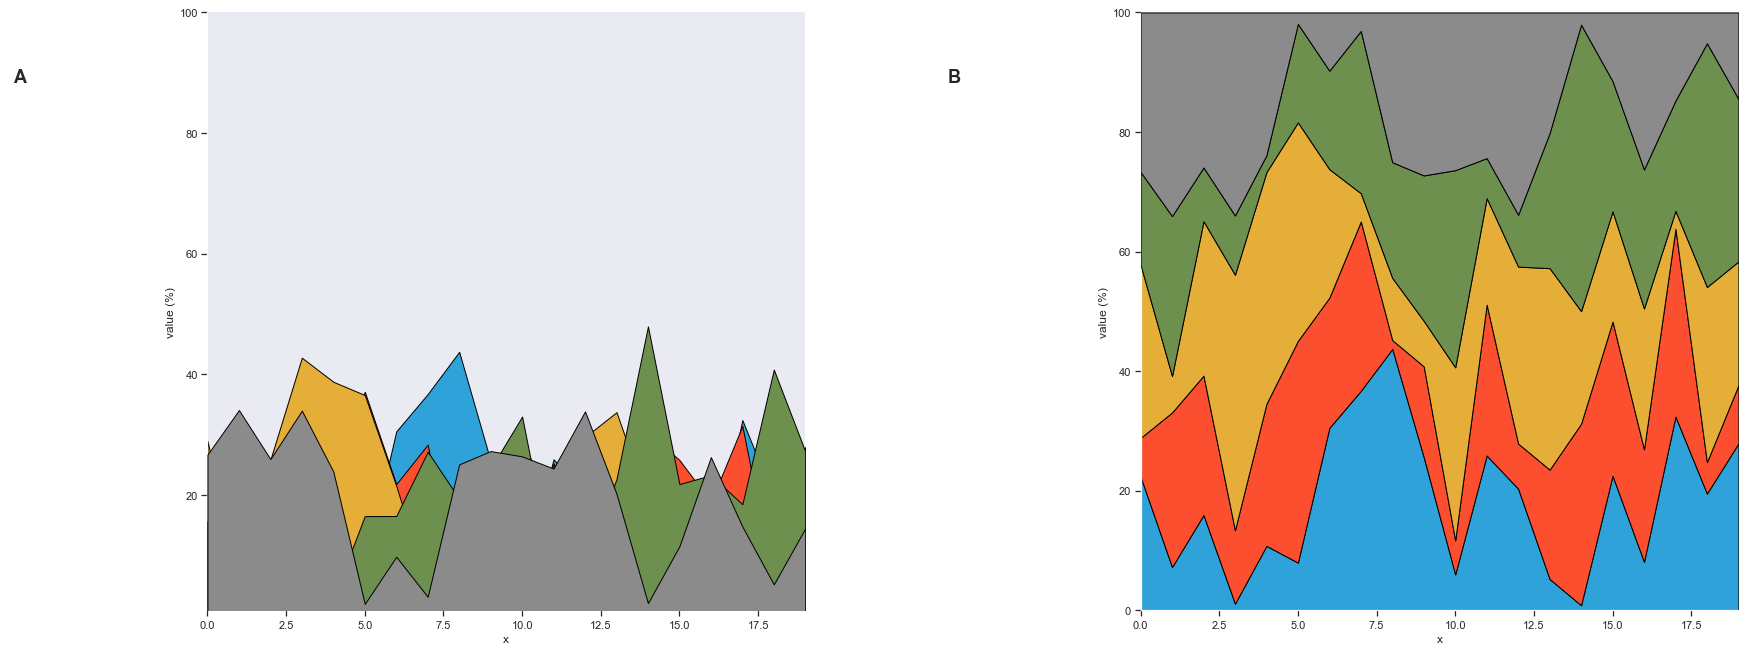

In [27]:
# http://holoviews.org/Tutorials/Elements.html
    
    
values = np.random.rand(5, 20)
percentages = (values/values.sum(axis=0)).T*100

overlay = hv.Overlay([hv.Area(percentages[:, i], vdims=[hv.Dimension('value', unit='%')]) for i in range(5)])
overlay + hv.Area.stack(overlay)

In [ ]:
# tables[2]["Variable"]

In [ ]:
# BES_Panel[ corr_vars[2] ].cat.ordered

In [ ]:
# a["Variable"].cat.ordered

In [137]:
# search(BES_Panel,"CampaignDay")

CampaignDayW5     30832
CampaignDayW8     33502
CampaignDayW12    34394
dtype: int64

In [150]:
## What do we want in a measure of "campaign volatility"?

# Guess we're trying to get at *day-to-day* volatility in excess of *within-day* volatility
# E.g. Is the STDEV of the whole sample bigger than MEAN STDEV of each day?

# Could also frame this as a statistical test about whether the daily samples are part of the same distribution?

# -> looks like the variance ration test

# https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
# We're really talk about whether the time series is "stationary"
# But note that the exogenous impacts we're thinking of are a mixture of linear trends *and structural break points*

# relevant python package:
# https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#Variance-Ratio-Testing

In [159]:
sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW12' ].notnull()).sum()
# corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW12' ])

In [144]:
%%time
means = BES_reduced_with_na.groupby(BES_Panel[ 'CampaignDayW12' ]).mean()
means.std()/means.mean()

Wall time: 10.3 s


In [164]:
mean_daily_std.loc["miilabelW1_aging population"]

0.0015290448

In [167]:
%%time
mean_daily_std = BES_reduced_with_na.groupby(BES_Panel[ 'CampaignDayW12' ]).std().mean()
whole_period_std = BES_reduced_with_na[BES_Panel[ 'CampaignDayW12' ].notnull()].std()
relative_stds = mean_daily_std/whole_period_std
display( relative_stds.dropna().sort_values() )

miilabelW1_aging population                                                  0.160816
miilabelW4_flooding                                                          0.162856
mii_catW6_domestic emergency                                                 0.165651
miilabelW1_civil liberties                                                   0.168508
miilabelW3_pol values-left                                                   0.169255
miilabelW3_class difference                                                  0.169260
miilabelW4_pol values-left                                                   0.169296
miilabelW2_energy                                                            0.169601
miilabelW4_class difference                                                  0.171405
miilabelW4_youth                                                             0.171409
mii_catW11_domestic emergency                                                0.171935
mii_catW13_Referendum unspecified                     

Wall time: 14.1 s


In [171]:
std_df = pd.DataFrame(relative_stds, columns= ["rel_std"])
std_df["sample_size"] = sample_size
std_df["mean_daily_std"] = mean_daily_std
std_df["whole_period_std"] = whole_period_std
std_df.sort_values(by="rel_std").dropna()#.head(100)

# std_df.loc["postalTurnoutW12_Yes"]

rel_std  sample_size  \
miilabelW1_aging population                         0.160816        11061   
miilabelW4_flooding                                 0.162856        13551   
mii_catW6_domestic emergency                        0.165651        15701   
miilabelW1_civil liberties                          0.168508        11061   
miilabelW3_pol values-left                          0.169255        10829   
miilabelW3_class difference                         0.169260        10829   
miilabelW4_pol values-left                          0.169296        13551   
miilabelW2_energy                                   0.169601        11405   
miilabelW4_class difference                         0.171405        13551   
miilabelW4_youth                                    0.171409        13551   
mii_catW11_domestic emergency                       0.171935        22759   
mii_catW13_Referendum unspecified                   0.173084        24345   
miilabelW5_youth                                    0.173692        14054   
mii_catW8_economy-personal                          0.174637        20516   
mii_catW5_asylum                                    0.174807        15754   
miilabelW5_class difference                         0.174996        14054   
miilabelW5_civil liberties                          0.235260        14054   
mii_catW1_constitutional                            0.237820        12840   
mii_catW13_economy-personal                         0.238303        24345   
miilabelW4_civil liberties                          0.238756        13551   
EUMIICategoryW8_EU spending                         0.239598        11336   
miilabelW6_national security                        0.240474        12893   
mii_catW5_economy-personal                          0.241603        15754   
miilabelW4_aging population                         0.244177        13551   
mii_catW9_social care                               0.245750        19666   
miilabelW4_energy                                   0.245885        13551   
mii_catW11_economy-personal                         0.246425        22759   
mii_catW9_economy-personal                          0.248542        19666   
mii_catW1_asylum                                    0.248657        12840   
miilabelW2_civil liberties                          0.250635        11405   
...                                                      ...          ...   
spendLeast3W3_Defence                               1.002025         2425   
labPriorities_econW9_Yes                            1.002057         4214   
discussantVoteName1W12_Conservative                 1.002228         4133   
generalElectionVoteSqueezeW5_Conservative           1.002230         2530   
spendLeast1W3_Research and Development              1.002232         2173   
partySiteLabW5_Yes                                  1.002340         2797   
payoffsizeA3W14__21.0                               1.002384         5333   
RV7W2_left school at 16                             1.002448         2841   
scotElectionVoteConstW3_Scottish National Party...  1.002526         2338   
ukipPriorities_crimeW1_Yes                          1.002529         2014   
discussPolDaysD1W4__7 days                          1.002600         3240   
labPriorities2_nhsW4_Yes                            1.002873         3565   
twitterInfo_1W5_Yes                                 1.002904         1987   
ldPriorities_econW6_Yes                             1.003176         2960   
expectGoodConductGeneralW2__Expect 20xx electio...  1.003341         2659   
dv1ClassExpW2_Simmons                               1.004222         1977   
conPriorities_econW1_Yes                            1.004461         2150   
debateTwoWatchW12_Yes                               1.004533         7223   
partyContactCon_3W12_Yes                            1.004710         6852   
partyContactLab_1W12_Yes                            1.006101         7698   
partyContactLab_2W12_Yes                         

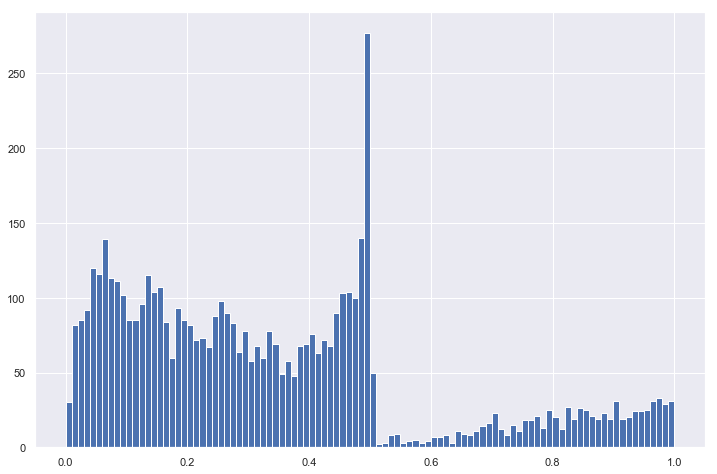

In [176]:
std_df[std_df["whole_period_std"]<1]["whole_period_std"].hist(bins=100, figsize=(12,8));

In [179]:
std_df[std_df["whole_period_std"]>.4].sort_values(by="rel_std").dropna()

rel_std  sample_size  \
postalTurnoutW12_Yes                                0.821732        11420   
scotReferendumTurnoutW2__Very likely that I wil...  0.904527         2822   
minIncomeGetByW4                                    0.904729         2093   
newspaperW12_None                                   0.919881        34394   
minIncomeWellOffW4                                  0.927782         2105   
scotReferendumTurnoutW1__Very likely that I wil...  0.948050         2488   
noChanceCoalitionLabW12_Yes                         0.962959        32082   
finlit2W2__Less than today                          0.970192         2464   
majorityPartyLabW12__Very likely                    0.975158        30368   
scotTurnoutW7__Very likely that I will vote         0.976676         2716   
expectationDevoScotW6__It will get many more po...  0.977513         2753   
debateOneWatchW12_Yes                               0.977578        19788   
small_mii_catW12_Europe                             0.978652        29286   
partyContactLDW12_Yes                               0.979563        12344   
scotSNPW6__7 - Very strongly Scottish               0.979638         2857   
labUnitedW12__Very united                           0.979869        30134   
mii_catW12_europe                                   0.980659        31081   
majorityPartyConW12__Very likely                    0.981019        30438   
finlit2W4__Less than today                          0.981582         2544   
partyContact1W12_Yes                                0.981947        33162   
EUIntegrationUKIPW3__Protect our independence       0.984010         6502   
accessMediaW3__Yes, I know such a person and co...  0.984935         3388   
refChoiceCertaintyW2__Completely certain            0.985172         2543   
expectationDevoScotW4__It will get many more po...  0.985225         2691   
snpSupportW8__Mainly leave                          0.985643         2585   
pidConnectedW1__Strongly agree                      0.987303         1953   
finlit3W2__A portfolio of different company shares  0.987310         2312   
generalElectionVotePostW12_Labour                   0.987982         4164   
scotDevoMaxW1__It should have many more powers      0.988364         2434   
pidInterestedOthersW1__Strongly agree               0.988673         2080   
...                                                      ...          ...   
motive1W11__Strongly agree                          1.001764         6092   
spendLeast3W3_Environmental Policy                  1.001794         2425   
spendMost6W3_Education                              1.001812         2500   
ptvConW8__Very likely                               1.001829         4876   
euIDW8_The leave side                               1.001841         3760   
generalElectionVoteSqueezeW12_Conservative          1.001842         4302   
debateThreeWatchW5_Yes                              1.001879         2763   
devoResponsibleScotDefenceW4_The UK Parliament      1.001908         2772   
ptvSNPW7__Very likely                               1.001925         2633   
mapGreenW3                                          1.001995         6547   
spendLeast3W3_Defence                               1.002025         2425   
labPriorities_econW9_Yes                            1.002057         4214   
discussantVoteName1W12_Conservative                 1.002228         4133   
generalElectionVoteSqueezeW5_Conservative           1.002230         2530   
partySiteLabW5_Yes                                  1.002340         2797   
payoffsizeA3W14__21.0                               1.002384         5333   
RV7W2_left school at 16                             1.002448         2841   
scotElectionVoteConstW3_Scottish National Party...  1.002526         2338   
discussPolDaysD1W4__7 days                          1.002600         3240   
labPriorities2_nhsW4_Yes                            1.002873         3565   
twitterInfo_1W5_Yes                              

In [256]:
# import numpy as np
# import pandas as pd
# import arch.data.frenchdata
# ff = arch.data.frenchdata.load()
# excess_market = ff.iloc[:, 0]  # Excess Market
# print(ff.describe())

In [259]:
# BES_Panel["CampaignDayW12"]

In [260]:
# search(BES_reduced_with_na,"CampaignDayW12")


In [284]:
# %%time

# pattern = "CampaignDayW12"
# name = "CampaignDayW12"
# corr_type = "spearman"
# df,corr_type = make_corr_summary(BES_reduced_with_na, name, corr_type, pattern=pattern)
# # display_corr(df, name, corr_type, text_wrap_length=50)

In [283]:
# df[df["abs_r"]>.05].index

In [ ]:
### LAZY ATTEMPT TO LOOK AT LINEAR SHIFTS (CAMPAIGN DAY X VAR CORRELATIONS)

In [138]:
%%time
# 2017GE CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW12' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW12' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()


Wall time: 56.7 s


In [139]:
display( corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(50) )

corr  sample_size  \
postalTurnoutW12_Yes                                0.484243        11420   
small_mii_catW12_Terrorism                          0.283257        29286   
mii_catW12_terrorism                                0.274498        31081   
noChanceCoalitionLabW12_Yes                        -0.240808        32082   
majorityPartyLabW12__Very likely                    0.217966        30368   
labUnitedW12__Very united                           0.180555        30134   
majorityPartyConW12__Very likely                   -0.180542        30438   
small_mii_catW12_Europe                            -0.170517        29286   
partyContact1W12_Yes                                0.164664        33162   
mii_catW12_europe                                  -0.161981        31081   
newspaperW12_Other Newspaper                       -0.161808        34394   
partyContactLabW12_Yes                              0.160224        12344   
partyContactLab_2W12_Yes                            0.156154         7698   
partyContactConW12_Yes                              0.144176        12344   
debateOneWatchW12_Yes                               0.141722        19788   
newspaperW12_None                                   0.141338        34394   
partyContactUKIPW12_Yes                             0.135505        12344   
partyContactLDW12_Yes                               0.134216        12344   
partyContactLab_5W12_Yes                           -0.131400         7698   
partyContactLD_5W12_Yes                            -0.122355         4492   
labCandCorbyniteW12_Yes                             0.121620        11863   
winConstituencyLabW12__100 - Very likely to win     0.116371        32049   
bestPMW12_Jeremy Corbyn                             0.114370        24337   
participation_5W12_Yes                              0.100856        33569   
partyContactCon_5W12_Yes                           -0.100578         6852   
partyContactCon_2W12_Yes                            0.093704         6852   
partyContactLD_2W12_Yes                             0.093656         4492   
changeViewW12_Yes                                   0.093544        33333   
handleMIILabW12__Very well                          0.092578         6916   
noChanceCoalitionSNPW12_Yes                        -0.092190        32082   
generalElectionVoteUnsqueezeW12_Labour              0.087319        21051   
likeCorbynW12__Strongly like                        0.085068        32400   
discussPolDaysW12__7 days                           0.083487        32094   
generalElectionVotePostW12_United Kingdom Indep... -0.083459         4164   
mii_catW12_defence                                  0.078601        31081   
conToneW12__5 - Focused mainly on putting forwa... -0.078487         7135   
fbInfo_3W12__Don't follow politics on facebook     -0.076331        22646   
fbInfo_1W12__Don't follow politics on facebook     -0.074068        22646   
generalElectionVoteUnsqueezeW12_Conservative       -0.073219        21051   
ukipUnitedW12__Very united                          0.071622        26643   
successReduceInequalityLabW12_Yes                   0.070267         6432   
fbInfo_2W12__Don't follow politics on facebook     -0.069340        22646   
conUnitedW12__Very united                          -0.069246        29786   
partyContactLD_3W12_Yes                            -0.067288         4492   
generalElectionVoteW12_Labour                       0.066575        29517   
spendLeast3W3_Health                               -0.066263         2425   
likeLabW12__Strongly like                           0.065277        32625   
sharedContentOnline_1W12_Yes                        0.061260        23079   
likeMayW12__Strongly like                          -0.060411        32642   
changeEducationLabW12__Getting a lot better         0.059106        30090   

                                                    absolute corr  
postalTurnoutW12_Yes                                     0.4

In [130]:
%%time
# 2016EUREF CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW8' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW8' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(30)

Wall time: 55.6 s


In [136]:

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(50)

corr  sample_size  \
postalTurnoutW8_Yes                                 0.541465        10619   
partyContactVoteLeaveW8_Yes                         0.230744         5294   
discussPolDaysW8__7 days                            0.167848        31632   
euSources_5W8_Yes                                   0.162390        26967   
participation_4W8_Yes                               0.156192         6070   
euSources_1W8_Yes                                   0.152425        27931   
partyContactConW8_Yes                              -0.144512         5294   
euSources_4W8_Yes                                   0.143808        23823   
partyContactStrongerInW8_Yes                        0.139737         5294   
euSources_111W8_Yes                                -0.139462        30914   
conUnitedW8__Very united                           -0.122790        28837   
euSources_2W8_Yes                                   0.121649        22612   
ukipUnitedW8__Very united                           0.120628        26924   
euSources_3W8_Yes                                   0.119642        20603   
participation_5W8_Yes                               0.117456         6070   
partyContactLDW8_Yes                               -0.113786         5294   
labUnitedW8__Very united                            0.094340        28599   
partyContact1W8_Yes                                 0.088145        32288   
euRefExpectationW8__100 - UK will definitely vo...  0.086909        28345   
partyContactGrnW8_Yes                              -0.085932         5294   
LRAL_mii_catW8_Lib-auth                             0.079137        29068   
efficacyEUW8__Strongly agree                        0.074442        32714   
mii_catW8_Referendum unspecified                    0.074201        30405   
euGovtLeafletW8_Yes, received but not read it      -0.072674        26192   
partyContactOthRemainW8_Yes                         0.071667         5294   
bestOnMIIW8_No party is best able to handle thi...  0.071048        26239   
participation_6W8_Yes                               0.070034         6070   
LRAL_mii_catW8_Left-right                          -0.068580        29068   
small_mii_catW8_Europe                              0.065998        29068   
euID6W8__Strongly agree                             0.064034         4479   
euID4W8__Strongly agree                             0.062173         3966   
partyContactOtherPartyW8_Yes                       -0.060915         5294   
scotShareBurdenW3_Taxes collected in Scotland only  0.060227         2181   
euID7W8__Strongly agree                             0.059640         4535   
scotDevoMaxW3__It should have many more powers      0.059419         2955   
econGenRetroW8__Got a lot better                    0.059416        14439   
euID1W8__Strongly agree                             0.058428         4555   
tuSupportW8__Mainly leave                          -0.056812        27021   
euID3W8__Strongly agree                             0.056348         4932   
changeEconomyW8__Getting a lot better               0.055376        32242   
satDemScotW8__Very satisfied                        0.054734         4077   
likeSalmondW1__Strongly like                        0.054366         2753   
euID5W8__Strongly agree                             0.053509         4828   
noneuMoreW8__Many more                              0.053267        31083   
euRefInterestW8__Very interested                    0.053136        33085   
mii_catW8_europe                                    0.053123        30405   
immigConW8__Allow many more                         0.052765        26888   
spendLeast5W3_Education                            -0.052696         2674   
euKnow2W8_False                                     0.052478        27809   
partyIdSqueezeW6_Liberal Democrat                  -0.051903         3414   

                                                    absolute corr  
postalTurnoutW8_Yes                                      0.5

In [134]:
BES_Panel["LRAL_mii_catW8"].value_counts()

Lib-auth              21020
Left-right             7250
Other                  1203
General-negativity      798
Name: LRAL_mii_catW8, dtype: int64

In [140]:
search(BES_reduced_with_na,"likeBennett")

likeBennettW4__Strongly like    19921
likeBennettW5__Strongly like    24802
likeBennettW6__Strongly like    24983
likeBennettW7__Strongly like    21164
likeBennettW8__Strongly like    23936
likeBennettW9__Strongly like    21022
dtype: int64

In [141]:
BES_reduced_with_na["likeBennettW5__Strongly like"].corr(BES_Panel[ 'CampaignDayW5' ])

# it's about the Don't knows!

0.003240138532536074

In [128]:
%%time
# 2015GE CAMPAIGN

# Correlations with CampaignDay (catches big linear effects across whole timeseries)

# Obvious: chance to have postal-voted already/have read a leaflet/have discussed pol a lot in last 7 days
#          talked about politics with people/have received fb contact from candidate&party/have been contacted by parties
# NonObvious: Conviction Labour/Conservatives would form majority falls with campaign duration (faster for Lab)
#             Conviction Labour wd form coalition with SNP rises/with UKIP falls
#             Conviction SNP wd win constituency rises


sample_size = BES_reduced_with_na.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW5' ].notnull()).sum()
corr = BES_reduced_with_na.corrwith(BES_Panel[ 'CampaignDayW5' ])

corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(30)

corr  sample_size  \
postalTurnoutW5_Yes                             0.524393         8989   
discussPolDaysW5__7 days                        0.133703        29498   
labPartnerSNPW5_Would join Labour               0.107520        10890   
participation_5W5_Yes                           0.106275        30263   
winConstituencySNPW5__100 - Very likely to win  0.099824         5214   
majorityPartyLabW5__Very likely                -0.093113        27579   
infoSourcePeopleW5__More than 2 hours           0.085988        30131   
fbInfo_1W5__Don't follow politics on facebook  -0.073109        19952   
labPartnerUKIPW5_Would join Labour             -0.072688        23509   
profile_newspaperW13_The Sun                   -0.070719        15736   
discussantVoteName1W12_Conservative            -0.070026         2103   
generalElectionVoteSqueezeW11_Conservative     -0.069444         2641   
profile_newspaperW11_The Sun                   -0.068982        15466   
conPartnerUKIPW5_Would join Conservatives       0.068036        24823   
profile_newspaper_The Sun                      -0.067612        30832   
majorityPartyConW5__Very likely                -0.067556        27556   
discussantVoteName1W12_Labour                   0.067184         2103   
refFairnessW2W3__Strongly agree                -0.067110         4385   
profile_newspaperW10_The Sun                   -0.065101        14479   
fbInfo_3W5__Don't follow politics on facebook  -0.063922        19952   
participation_3W5_Yes                           0.063678        30263   
ldPriorities_econW2_Yes                         0.062688         2959   
fbInfo_2W5__Don't follow politics on facebook  -0.061993        19952   
conPriorities_nhsW2_Yes                         0.060613         3547   
noChanceCoalitionSNPW5_Yes                     -0.060164        29276   
partyContactConW5_Yes                           0.060119         5406   
conPriorities_crimeW2_Yes                       0.059300         3547   
partyIdSqueezeW9_No - none                     -0.059274         3647   
profile_socgradeW13__E                         -0.059152        15407   
profile_socgradeW14__E                         -0.058905        13423   

                                                absolute corr  
postalTurnoutW5_Yes                                  0.524393  
discussPolDaysW5__7 days                             0.133703  
labPartnerSNPW5_Would join Labour                    0.107520  
participation_5W5_Yes                                0.106275  
winConstituencySNPW5__100 - Very likely to win       0.099824  
majorityPartyLabW5__Very likely                      0.093113  
infoSourcePeopleW5__More than 2 hours                0.085988  
fbInfo_1W5__Don't follow politics on facebook        0.073109  
labPartnerUKIPW5_Would join Labour                   0.072688  
profile_newspaperW13_The Sun                         0.070719  
discussantVoteName1W12_Conservative                  0.070026  
generalElectionVoteSqueezeW11_Conservative           0.069444  
profile_newspaperW11_The Sun                         0.068982  
conPartnerUKIPW5_Would join Conservatives            0.068036  
profile_newspaper_The Sun                            0.067612  
majorityPartyConW5__Very likely                      0.067556  
discussantVoteName1W12_Labour                        0.067184  
refFairnessW2W3__Strongly agree                      0.067110  
profile_newspaperW10_The Sun                         0.065101  
fbInfo_3W5__Don't follow politics on facebook        0.063922  
participation_3W5_Yes                                0.063678  
ldPriorities_econW2_Yes                              0.062688  
fbInfo_2W5__Don't follow politics on facebook        0.061993  
conPriorities_nhsW2_Yes                              0.060613  
noChanceCoalitionSNPW5_Yes                           0.060164  
partyContactConW5_Yes                                0.060119  
conPriorities_crimeW2_Yes                            0.05930

In [113]:
W5cats = [x for x in BES_Panel.columns if ("W5" in x) & (BES_Panel[x].dtype.name =='category')]
W5_cats_df = BES_Panel[W5cats].apply(lambda x : x.cat.codes).replace(-1,np.nan)

sample_size = W5_cats_df.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW5' ].notnull()).sum()
corr = W5_cats_df.corrwith(BES_Panel[ 'CampaignDayW5' ])


corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21)

corr  sample_size  absolute corr
postalTurnoutW5         0.516285         9004       0.516285
discussPolDaysW5        0.112139        30832       0.112139
winConstituencySNPW5    0.093173         5517       0.093173
participation_5W5       0.090274        30832       0.090274
likeBennettW5          -0.072470        30825       0.072470
infoSourcePeopleW5      0.071878        30831       0.071878
fbInfo_1W5             -0.070705        20513       0.070705
majorityPartyLabW5     -0.069642        30827       0.069642
labPartnerSNPW5         0.069545        12678       0.069545
fbInfo_3W5             -0.062136        20513       0.062136
lrgreensW5             -0.061327        30832       0.061327
fbInfo_2W5             -0.059772        20513       0.059772
partyContactConW5       0.059703         5457       0.059703
lrPCW5                 -0.057224         2958       0.057224
lrSNPW5                -0.052716         5516       0.052716
majorityPartyConW5     -0.052714        30827       0.052714
conPartnerSNPW5         0.051684        12678       0.051684
noChanceCoalitionSNPW5 -0.048882        30831       0.048882
noChanceCoalitionLDW5  -0.046767        30831       0.046767
conToneW5              -0.046253        30827       0.046253
labPartnerUKIPW5       -0.045839        30831       0.045839

In [31]:
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

Index(['postalTurnoutW5', 'discussPolDaysW5', 'winConstituencySNPW5',
       'participation_5W5', 'likeBennettW5', 'infoSourcePeopleW5',
       'fbInfo_1W5', 'majorityPartyLabW5', 'labPartnerSNPW5', 'fbInfo_3W5',
       'lrgreensW5', 'fbInfo_2W5', 'partyContactConW5', 'lrPCW5', 'lrSNPW5',
       'majorityPartyConW5', 'conPartnerSNPW5', 'noChanceCoalitionSNPW5',
       'noChanceCoalitionLDW5', 'conToneW5', 'labPartnerUKIPW5'],
      dtype='object')

In [32]:
corr_vars

NameError: name 'corr_vars' is not defined

In [114]:
campaign_dec = pd.crosstab(BES_Panel, values='wt_daily_W12',
                              columns = 'generalElectionVoteW12',
                              index='CampaignDayW12', aggfunc=np.sum)
campaign_dec

TypeError: crosstab() got multiple values for argument 'index'

In [112]:
campaign_dec = pd.pivot_table(BES_Panel, values='wt_daily_W12',
                              columns = 'generalElectionVoteW12',
                              index='CampaignDayW12', aggfunc=np.mean)

In [124]:
crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW12' ],
                       columns = BES_Panel[ "generalElectionVoteW12" ],
                       values  = BES_Panel[ "wt_daily_W12" ],
                       aggfunc = sum,
                       normalize='index')

crosstab.index = crosstab.index.astype('int')
crosstab.index.name = "Campaign Day 2017 GE"
crosstab.columns.name = "Voting Intention 2017 GE"

# crosstab*100

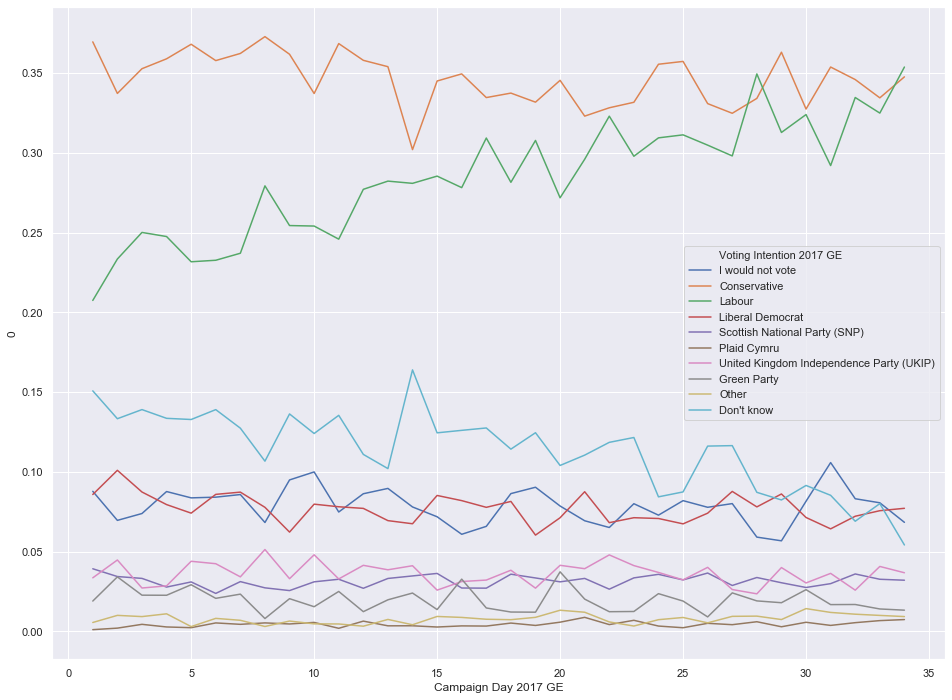

In [123]:
plt.figure(figsize=(16,12))
sns.lineplot(data=crosstab.stack().reset_index(), x = crosstab.index.name, hue=crosstab.columns.name, y=0);

In [138]:
df["style"] = "-"
df["style"][df[crosstab.columns.name]=="Don't know"]= "^"
df
#df["crosstab.columns.name"]

Campaign Day 2015 GE                  Voting Intention 2015 GE  \
0                       1                          I would not vote   
1                       1                              Conservative   
2                       1                                    Labour   
3                       1                          Liberal Democrat   
4                       1             Scottish National Party (SNP)   
..                    ...                                       ...   
413                    38  United Kingdom Independence Party (UKIP)   
414                    38                               Green Party   
415                    38              British National Party (BNP)   
416                    38                                     Other   
417                    38                                Don't know   

     voting intention % style  
0              3.888406     -  
1             29.133854     -  
2             31.424378     -  
3              7.010751     -  
4              4.149206     -  
..                  ...   ...  
413           13.694111     -  
414            5.736400     -  
415            0.060463     -  
416            1.766477     -  
417            3.691758     ^  

[418 rows x 4 columns]

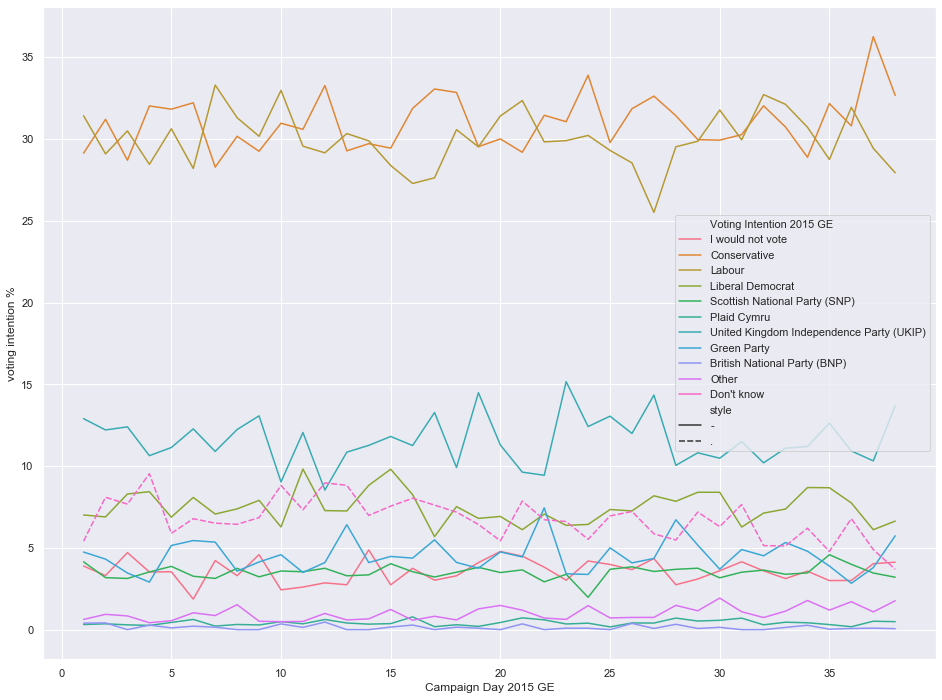

In [144]:
crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                       columns = BES_Panel[ "generalElectionVoteW5" ],
                       values  = BES_Panel[ "wt_daily_W5" ],
                       aggfunc = sum,
                       normalize='index')

crosstab.index = crosstab.index.astype('int')
crosstab.index.name = "Campaign Day 2015 GE"
crosstab.columns.name = "Voting Intention 2015 GE"
value_name = "voting intention %"

# crosstab*100
df = (crosstab*100).stack().reset_index()
df.columns = [crosstab.index.name,crosstab.columns.name,value_name]

df["style"] = "-"
df["style"][df[crosstab.columns.name]=="Don't know"]= "."

plt.figure(figsize=(16,12))
sns.lineplot(data=df, x = crosstab.index.name, hue=crosstab.columns.name, y=value_name, style=df["style"]);


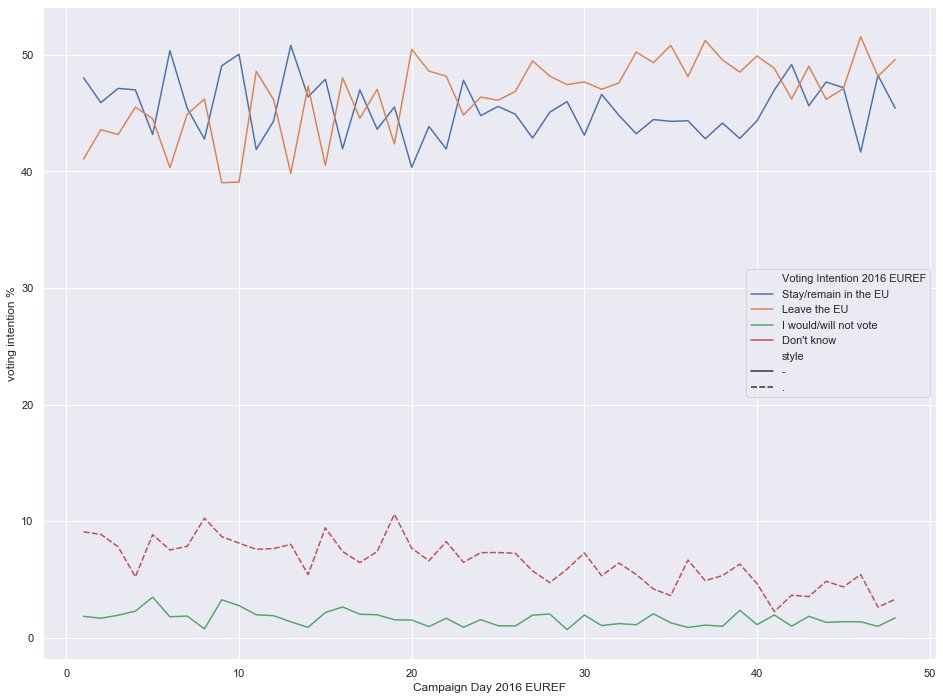

In [146]:
crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW8' ],
                       columns = BES_Panel[ "euRefVoteW8" ],
                       values  = BES_Panel[ "wt_daily_W8" ],
                       aggfunc = sum,
                       normalize='index')

crosstab.index = crosstab.index.astype('int')
crosstab.index.name = "Campaign Day 2016 EUREF"
crosstab.columns.name = "Voting Intention 2016 EUREF"
value_name = "voting intention %"

# crosstab*100
df = (crosstab*100).stack().reset_index()
df.columns = [crosstab.index.name,crosstab.columns.name,value_name]

df["style"] = "-"
df["style"][df[crosstab.columns.name]=="Don't know"]= "."

plt.figure(figsize=(16,12))
sns.lineplot(data=df, x = crosstab.index.name, hue=crosstab.columns.name, y=value_name, style=df["style"]);
